### Questions that will be answered using selected dataset: 
- What is the best location in Toronto to have Chinese cuisine?
- Which is the best neighbourhood to open Chinese restaurant?

In [ ]:
## 

#### Required Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import urllib.request
import time

from urllib.request import urlopen

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

In [2]:
pip install lxml

     |████████████████████████████████| 5.5MB 14.3MB/s eta 0:00:01 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install BeautifulSoup4

     |████████████████████████████████| 122kB 7.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from bs4 import BeautifulSoup

In [6]:
#requests.get(url).text will ping a website and return you HTML of the website.
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)

soup = BeautifulSoup(page.text, 'lxml')
#soup.prettify()

In [22]:
postalCode_table = soup.find(class_='wikitable sortable')
#postalCode_table
soup.title
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [23]:
dt = []
col = []

for index, tr in enumerate(postalCode_table.findAll('tr')):
    sec = []
    for td in tr.findAll(['th','td']):
        sec.append(td.text.rstrip())
        if (index == 0 ):
            col = sec
        else:
            dt.append(sec)

toronto_df = pd.DataFrame(data = dt, columns = col)
toronto_df.head(20).drop_duplicates().reset_index(drop=True)



,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [62]:
toronto_df = toronto_df[toronto_df['Borough'] != 'Not assigned'].reset_index(drop=True)
lat_long_dt = pd.read_csv("http://cocl.us/Geospatial_data")
toronto_df = toronto_df.merge(lat_long_dt)
toronto_df = toronto_df.drop_duplicates().reset_index(drop=True)
toronto_df.head()


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [63]:
toronto_df.shape

(103, 5)

So there are a total of 103 postal codes in Toronto. 

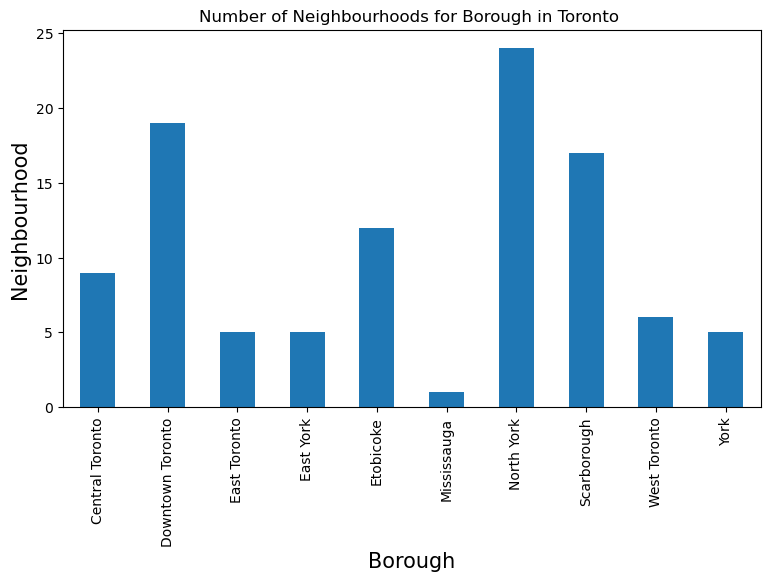

In [86]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighbourhoods for Borough in Toronto ')
# x-axis
plt.xlabel('Borough', fontsize = 15)
# y-axis
plt.ylabel('Neighbourhood', fontsize=15)
#setting a bar plot
toronto_df.groupby('Borough')['Postal Code'].count().plot(kind='bar')
#result
plt.show()

In this case, North York has the highest number of neighbourhoods.

In [7]:
pip install geocoder

     |████████████████████████████████| 102kB 5.7MB/s ta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize




#### Foursquare API Usage

In [25]:
# code: NUTNULLUNGPCQQK2Z1U3PFKYSJ10IT5DDAT4UGCHDVQQKZH2#_=_
# accessToken: U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA' # your Foursquare Secret
ACCESS_TOKEN = 'U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA


#### Geographical Data of Toronto
thus, geolocator has been applied to find out the latitude and longitude of toronto

In [20]:
address ='Toronto, Ontario'
# get geo location of address
geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [87]:
search_query = 'Chinese Restaurant'
radius = 1000
print(search_query + ' .... OK!')

Chinese Restaurant .... OK!


In [88]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=&client_secret=44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA&ll=43.6534817,-79.3839347&oauth_token=U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q&v=20180604&query=Chinese Restaurant&radius=1000&limit=30'

In [89]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6002494a46ba4d41982be1ea'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4d06c1ccc2e53704428cc567',
    'name': 'North-East Chinese Restaurant 華北美食',
    'location': {'address': '476 Dundas St.',
     'crossStreet': 'Huron',
     'lat': 43.6531846832903,
     'lng': -79.3966766276528,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.6531846832903,
       'lng': -79.3966766276528}],
     'distance': 1026,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['476 Dundas St. (Huron)', 'Toronto ON']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1610762